## Distribuições no Pandas

#### Distribuições: Conjunto de todas as variáveis aleatórias possíveis.
Referência: [Think Stats, Allen B. Downey](https://greenteapress.com/thinkstats2/thinkstats2.pdf)
* Distribuição Binomial
  * Duas possibilidades de saída
  * Discreta e Binária







In [0]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1,0.5)

0

In [3]:
np.random.binomial(1000, 0.5)/1000

0.498

In [4]:
chance_de_tornado = 0.01/100
np.random.binomial(100000, chance_de_tornado)

5

In [5]:
chance_de_tornado = 0.01

tornados = np.random.binomial(1, chance_de_tornado, 1000000)

two_days_in_a_row = 0
for j in range(1, len(tornados)-1):
  if tornados[j] == 1 and tornados[j-1] == 1:
    two_days_in_a_row += 1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

95 tornadoes back to back in 2739.72602739726 years


* Distribuição Uniforme
  * Todos os valores possuem a mesma probabilidade de aparecer.
* Distribuição Normal
  * Máxima probsbilidade de ocorrer é igual a zero.

In [6]:
np.random.uniform(0, 1)

0.7098760208280819

In [7]:
np.random.normal(0.75)

0.05160374251524924

##### Fórmula para o desvio padrão:

$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [8]:
distribution = np.random.normal(0.75, size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9798986506249234

In [9]:
np.std(distribution)

0.9798986506249234

In [10]:
import scipy.stats as stats

stats.kurtosis(distribution)

-0.20992622427117258

* Distribuição Qui-Quadrado
  * Grau de Liberdade
    * Relacionado ao número de amostras tomadas a partir de uma população normal.
  * Conforme o grau de liberdade aumenta, o formato da distribuição muda.

* Distribuições Bimodais
  * Distribuições com dois pontos máximos.
  * Mistura de modelos gaussianos.

In [11]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9753056516458223

In [12]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2422138183462437

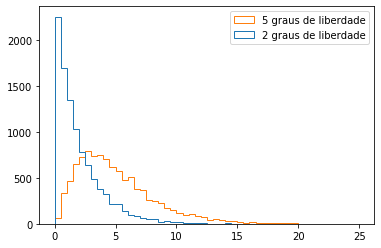

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', label=['2 graus de liberdade', '5 graus de liberdade'])
plt.legend(loc='upper right')


## Teste de Hipóteses em Python

* Hipótese é uma declaração que pode ser testada.
  * Hipótese Alternativa: Nossa ideia.
  * Hipótese Nula: A alternativa da nossa ideia.

* Teste T

* Nível de Significância ($\alpha$)
  * Limite de quanto de uma chance estamos dispostos a aceitar.
  * Valores típicos em Ciências Sociais: 0.1, 0.05 ou 0.01

* p-Hacking
  * Correlações falsas ao invés de resultados generalizáveis
  * Ocorre quando são realizados muitos testes T
  * Formas de Resolver:
    * Correção Bonferoni
    * Conjuntos de Treino e Teste
    * Pré-Registro do experimento 

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/grades.csv')

In [16]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [17]:
len(df)

2315

In [0]:
early = df[df['assignment1_submission']<='2015-12-31']
late = df[df['assignment1_submission']>'2015-12-31']

In [19]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [20]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [0]:
from scipy import stats
stats.ttest_ind?

In [23]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [24]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [25]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)

In [26]:
stats.ttest_ind(early['assignment4_grade'], late['assignment4_grade'])

Ttest_indResult(statistic=0.16232182017140787, pvalue=0.8710666110447575)